In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [2]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

13582336/13568290 [==============================] - 0s 0us/step


In [3]:
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [4]:
# Take every sixth value starting from 5 to take every hour
df =df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [5]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


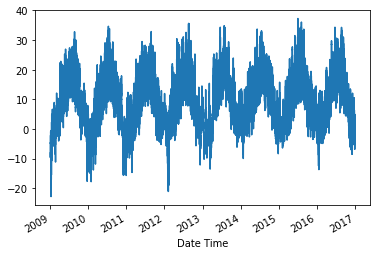

In [6]:
temp = df['T (degC)']
temp.plot()

In [7]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    # Get the 5 values
    row = [[a] for a in df_as_np[i:i+5]]
    X.append(row)
    label = df_as_np[i+5]
    y.append(label)
  return np.array(X), np.array(y)

In [8]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [9]:
X

array([[[-8.05],
        [-8.88],
        [-8.81],
        [-9.05],
        [-9.63]],

       [[-8.88],
        [-8.81],
        [-9.05],
        [-9.63],
        [-9.67]],

       [[-8.81],
        [-9.05],
        [-9.63],
        [-9.67],
        [-9.17]],

       ...,

       [[ 2.44],
        [ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ]],

       [[ 1.29],
        [-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75]],

       [[-0.42],
        [-0.98],
        [-1.4 ],
        [-2.75],
        [-2.89]]])

In [10]:
y

array([-9.67, -9.17, -8.1 , ..., -2.75, -2.89, -3.93])

In [11]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [13]:
cp = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(),
                       metrics=[RootMeanSquaredError()])

In [14]:
model1.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=10, callbacks=[cp])

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 7.2508 - root_mean_squared_error: 2.6927 - val_loss: 1.5937 - val_root_mean_squared_error: 1.2624


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 3.6836 - root_mean_squared_error: 1.9193 - val_loss: 1.1913 - val_root_mean_squared_error: 1.0915


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.8802 - root_mean_squared_error: 1.6971 - val_loss: 0.9568 - val_root_mean_squared_error: 0.9781


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3022 - root_mean_squared_error: 1.5173 - val_loss: 0.8297 - val_root_mean_squared_error: 0.9109


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8991 - root_mean_squared_error: 1.3781 - val_loss: 0.7190 - val_root_mean_squared_error: 0.8479


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6189 - root_mean_squared_error: 1.2724 - val_loss: 0.6977 - val_root_mean_squared_error: 0.8353


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4242 - root_mean_squared_error: 1.1934 - val_loss: 0.6169 - val_root_mean_squared_error: 0.7854


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2770 - root_mean_squared_error: 1.1300 - val_loss: 0.5923 - val_root_mean_squared_error: 0.7696


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1676 - root_mean_squared_error: 1.0805 - val_loss: 0.5612 - val_root_mean_squared_error: 0.7492


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0802 - root_mean_squared_error: 1.0393 - val_loss: 0.5351 - val_root_mean_squared_error: 0.7315


INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


In [15]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [16]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions,
                                   'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,-8.231712,-9.67
1,-8.231712,-9.17
2,-8.231712,-8.10
3,-7.404479,-7.66
4,-7.241115,-7.04
...,...,...
59995,6.161531,6.07
59996,7.049924,9.88
59997,12.114136,13.53
59998,15.467907,15.43


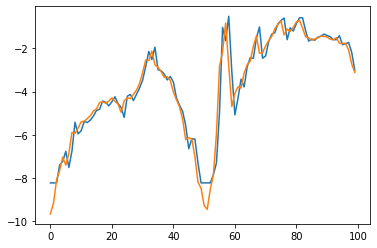

In [17]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [18]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions,
                                   'Actuals':y_val})
val_results

,Val Predictions,Actuals
0,15.852705,14.02
1,13.361328,13.67
2,12.992046,12.27
3,11.375690,11.19
4,10.384537,10.85
...,...,...
4995,17.538559,18.27
4996,17.409906,17.85
4997,16.965025,16.65
4998,15.829945,15.85


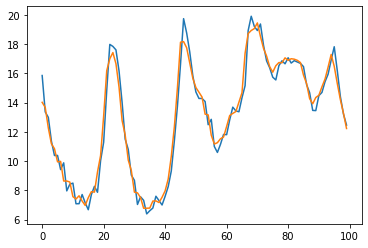

In [19]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [20]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions,
                                   'Actuals':y_test})
test_results

,Test Predictions,Actuals
0,14.313236,13.99
1,13.182383,13.46
2,12.881367,12.93
3,12.467672,12.43
4,12.047663,12.17
...,...,...
5081,-1.011626,-0.98
5082,-1.545164,-1.40
5083,-1.727563,-2.75
5084,-3.183456,-2.89


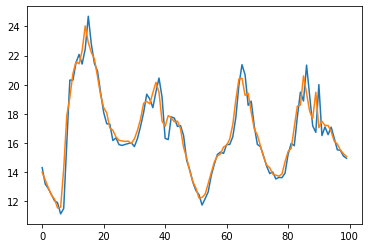

In [21]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [22]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(      Predictions  Actuals
 0       14.313236    13.99
 1       13.182383    13.46
 2       12.881367    12.93
 3       12.467672    12.43
 4       12.047663    12.17
 ...           ...      ...
 5081    -1.011626    -0.98
 5082    -1.545164    -1.40
 5083    -1.727563    -2.75
 5084    -3.183456    -2.89
 5085    -3.095643    -3.93
 
 [5086 rows x 2 columns], 0.6289967530698798)

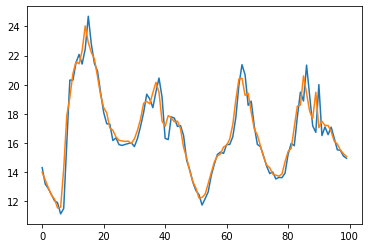

In [23]:
plot_predictions1(model1, X_test, y_test)

In [24]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4, 64)             192       
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [25]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(),
                       metrics=[RootMeanSquaredError()])

In [26]:
model2.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=10, callbacks=[cp2])

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.4802 - root_mean_squared_error: 1.5749 - val_loss: 0.6532 - val_root_mean_squared_error: 0.8082
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7371 - root_mean_squared_error: 0.8585 - val_loss: 0.5138 - val_root_mean_squared_error: 0.7168
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7368 - root_mean_squared_error: 0.8584 - val_loss: 0.5072 - val_root_mean_squared_error: 0.7122
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7151 - root_mean_squared_error: 0.8456 - val_loss: 0.5090 - val_root_mean_squared_error: 0.7134
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6857 - root_mean_squared_error: 0.8281 - val_loss: 0.5158 - val_root_mean_squared_error: 0.7182
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6767 - root_mean_squared_error: 0.8226 - val_loss: 0.4859 - val_root_mean_squared_error: 0.6971
INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6799 - root_mean_squared_error: 0.8246 - val_loss: 0.5092 - val_root_mean_squared_error: 0.7136
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6694 - root_mean_squared_error: 0.8182 - val_loss: 0.4969 - val_root_mean_squared_error: 0.7049
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6675 - root_mean_squared_error: 0.8170 - val_loss: 0.4983 - val_root_mean_squared_error: 0.7059
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6643 - root_mean_squared_error: 0.8151 - val_loss: 0.5458 - val_root_mean_squared_error: 0.7388


In [27]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 64)                12864     
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [28]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(),
                       metrics=[RootMeanSquaredError()])

In [29]:
model3.fit(X_train, y_train,
           validation_data=(X_val, y_val),
           epochs=10, callbacks=[cp3])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 4.2105 - root_mean_squared_error: 2.0520 - val_loss: 0.5281 - val_root_mean_squared_error: 0.7267


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6706 - root_mean_squared_error: 0.8189 - val_loss: 0.4970 - val_root_mean_squared_error: 0.7050


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6629 - root_mean_squared_error: 0.8142 - val_loss: 0.4902 - val_root_mean_squared_error: 0.7001


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6598 - root_mean_squared_error: 0.8123 - val_loss: 0.4999 - val_root_mean_squared_error: 0.7070
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6596 - root_mean_squared_error: 0.8121 - val_loss: 0.4813 - val_root_mean_squared_error: 0.6938


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6565 - root_mean_squared_error: 0.8103 - val_loss: 0.5112 - val_root_mean_squared_error: 0.7150
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6539 - root_mean_squared_error: 0.8087 - val_loss: 0.5008 - val_root_mean_squared_error: 0.7076
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6488 - root_mean_squared_error: 0.8055 - val_loss: 0.4810 - val_root_mean_squared_error: 0.6936


INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6480 - root_mean_squared_error: 0.8050 - val_loss: 0.6222 - val_root_mean_squared_error: 0.7888
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6478 - root_mean_squared_error: 0.8049 - val_loss: 0.4851 - val_root_mean_squared_error: 0.6965


In [30]:
temp_df = pd.DataFrame({'Temperature':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [31]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds']*(2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds']*(2* np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds']*(2* np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds']*(2* np.pi / year))

In [32]:
temp_df

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.953717,0.300706,0.006900,0.999976
2016-12-31 20:10:00,-1.40,1.483215e+09,-0.843391,0.537300,0.007617,0.999971
2016-12-31 21:10:00,-2.75,1.483219e+09,-0.675590,0.737277,0.008334,0.999965


In [33]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,-9.63,0.965926,0.258819,0.012916,0.999917


In [34]:
# [[[t1, ds1], [t2, ds2], [t3, ds3], [t4, ds4], [t5, ds5]]] [t6]
# [[[t2], [t3], [t4], [t5], [t6]]] [t7]
# [[[t3], [t4], [t5], [t6], [t7]]] [t8]

def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    # Get the 5 values
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [35]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [36]:
X2_train, y2_train = X2[:60000], y2[:60000]
X2_val, y2_val = X2[60000:65000], y2[60000:65000]
X2_test, y2_test = X2[65000:], y2[65000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [37]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [38]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[ 1.04009706e+00, -9.65925826e-01,  2.58819045e-01,
          5.22877889e-01, -8.52407598e-01],
        [ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
          5.20431780e-01, -8.53903251e-01],
        [ 5.37051663e-01, -7.16474371e-12,  1.00000000e+00,
          5.19819584e-01, -8.54276068e-01]],

       [[ 9.90732794e-01, -8.66025404e-01,  5.00000000e-01,
          5.22266764e-01, -8.52782169e-01],
        [ 8.49692028e-01, -7.07106781e-01,  7.07106781e-01,
          5.21655371e-01, -8.53156301e-01],
        [ 7.55664851e-01, -5.00000000e-01,  8.66025404e-01,
          5.21043709e-01, -8.53529995e-01],
        [ 6.66339032e-01, -2.58819045e-01,  9.65925826e-01,
  

In [39]:
model4 = Sequential()
model4.add(InputLayer((6,5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 64)                17920     
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [40]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(),
                       metrics=[RootMeanSquaredError()])

In [41]:
model4.fit(X2_train, y2_train,
           validation_data=(X2_val, y2_val),
           epochs=10, callbacks=[cp4])

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 8.5159 - root_mean_squared_error: 2.9182 - val_loss: 0.5541 - val_root_mean_squared_error: 0.7444


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5963 - root_mean_squared_error: 0.7722 - val_loss: 0.4206 - val_root_mean_squared_error: 0.6485


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5653 - root_mean_squared_error: 0.7518 - val_loss: 0.4179 - val_root_mean_squared_error: 0.6465


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5490 - root_mean_squared_error: 0.7409 - val_loss: 0.4694 - val_root_mean_squared_error: 0.6851
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5417 - root_mean_squared_error: 0.7360 - val_loss: 0.4188 - val_root_mean_squared_error: 0.6472
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5363 - root_mean_squared_error: 0.7323 - val_loss: 0.4075 - val_root_mean_squared_error: 0.6383


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5287 - root_mean_squared_error: 0.7271 - val_loss: 0.4360 - val_root_mean_squared_error: 0.6603
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5224 - root_mean_squared_error: 0.7228 - val_loss: 0.4028 - val_root_mean_squared_error: 0.6347


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5238 - root_mean_squared_error: 0.7238 - val_loss: 0.4913 - val_root_mean_squared_error: 0.7009
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5204 - root_mean_squared_error: 0.7214 - val_loss: 0.3949 - val_root_mean_squared_error: 0.6284


INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


(      Predictions  Actuals
 0       13.178835    13.46
 1       12.774275    12.93
 2       12.343289    12.43
 3       11.969548    12.17
 4       12.125633    11.55
 ...           ...      ...
 5080    -1.145568    -0.98
 5081    -1.540899    -1.40
 5082    -1.810972    -2.75
 5083    -3.244273    -2.89
 5084    -3.208064    -3.93
 
 [5085 rows x 2 columns], 0.4573261288542184)

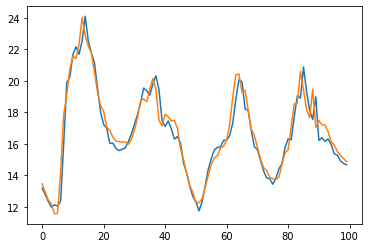

In [42]:
plot_predictions1(model4, X2_test, y2_test)

In [43]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


In [44]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [45]:
X3, y3 = df_to_X_y3(p_temp_df)
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [55]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:65000], y3[60000:65000]
X3_test, y3_test = X3[65000:], y3[65000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

In [56]:
p_training_mean3 = np.mean(X3_train[:, :, 0])
p_training_std3 = np.std(X3_train[:, :, 0])

temp_training_mean3 = np.mean(X3_train[:, :, 1])
temp_training_std3 = np.std(X3_train[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3
  return X

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [57]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

array([[[-1.07355644e+00,  1.04009390e+00, -9.65925826e-01,
          2.58819045e-01,  5.22877889e-01, -8.52407598e-01],
        [-1.00807435e+00,  9.90728707e-01, -8.66025404e-01,
          5.00000000e-01,  5.22266764e-01, -8.52782169e-01],
        [-9.51080673e-01,  8.49685305e-01, -7.07106781e-01,
          7.07106781e-01,  5.21655371e-01, -8.53156301e-01],
        ...,
        [-8.80748054e-01,  6.66328883e-01, -2.58819045e-01,
          9.65925826e-01,  5.20431780e-01, -8.53903251e-01],
        [-8.29817537e-01,  5.37039098e-01, -7.16474371e-12,
          1.00000000e+00,  5.19819584e-01, -8.54276068e-01],
        [-8.01927015e-01,  4.74744929e-01,  2.58819045e-01,
          9.65925826e-01,  5.19207120e-01, -8.54648446e-01]],

       [[-1.00807435e+00,  9.90728707e-01, -8.66025404e-01,
          5.00000000e-01,  5.22266764e-01, -8.52782169e-01],
        [-9.51080673e-01,  8.49685305e-01, -7.07106781e-01,
          7.07106781e-01,  5.21655371e-01, -8.53156301e-01],
        [-9.14701

In [58]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[-0.7934386 ,  0.41245076],
       [-0.76312281,  0.35368268],
       [-0.72189335,  0.32312327],
       ...,
       [ 1.48145784, -1.43051636],
       [ 1.41597574, -1.44697142],
       [ 1.35049365, -1.56920903]])

In [59]:
model5 = Sequential()
model5.add(InputLayer((7,6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 64)                18176     
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 18        
Total params: 18,714
Trainable params: 18,714
Non-trainable params: 0
_________________________________________________________________


In [60]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(),
                       metrics=[RootMeanSquaredError()])

In [61]:
model5.fit(X3_train, y3_train,
           validation_data=(X3_val, y3_val),
           epochs=10, callbacks=[cp5])

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.0310 - root_mean_squared_error: 0.1762 - val_loss: 0.0043 - val_root_mean_squared_error: 0.0654


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0056 - root_mean_squared_error: 0.0750 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0621


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0053 - root_mean_squared_error: 0.0728 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0610


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0051 - root_mean_squared_error: 0.0713 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0642
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0051 - root_mean_squared_error: 0.0712 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0604


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0050 - root_mean_squared_error: 0.0705 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0592


INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0050 - root_mean_squared_error: 0.0704 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0601
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0048 - root_mean_squared_error: 0.0696 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0602
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0048 - root_mean_squared_error: 0.0695 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0609
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0048 - root_mean_squared_error: 0.0693 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0612


In [62]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals': temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals})
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.440895,0.412451,-0.767991,-0.793439
1,0.388909,0.353683,-0.762970,-0.763123
2,0.340502,0.323123,-0.726727,-0.721893
3,0.340662,0.250251,-0.674815,-0.652773
4,0.294712,0.254952,-0.594098,-0.652773
...,...,...,...,...
95,0.726848,0.716869,-0.405086,-0.416310
96,0.680920,0.687485,-0.404402,-0.399333
97,0.658071,0.663978,-0.382592,-0.399333
98,0.654562,0.641646,-0.378140,-0.400546


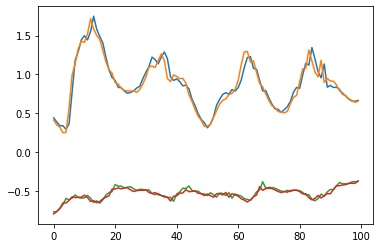

In [63]:
plot_predictions2(model5, X3_test, y3_test)

In [64]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std3) + temp_training_mean3
  return arr

def postprocess_p(arr):
  arr = (arr*p_training_std3) + p_training_mean3
  return arr

In [65]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = postprocess_p(predictions[:, 0]), postprocess_temp(predictions[:, 1])
  p_actuals, temp_actuals = postprocess_p(y[:, 0]), postprocess_temp(y[:, 1])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals': temp_actuals,
                          'Pressure Predictions': p_preds,
                          'Pressure Actuals': p_actuals})
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,-118.328705,-118.358049,-0.767991,-0.793439
1,-118.382332,-118.418681,-0.762970,-0.763123
2,-118.432281,-118.450209,-0.726727,-0.721893
3,-118.432114,-118.525392,-0.674815,-0.652773
4,-118.479523,-118.520542,-0.594098,-0.652773
...,...,...,...,...
95,-118.033684,-118.043978,-0.405086,-0.416310
96,-118.081062,-118.074293,-0.404402,-0.399333
97,-118.104637,-118.098546,-0.382592,-0.399333
98,-118.108261,-118.121586,-0.378140,-0.400546


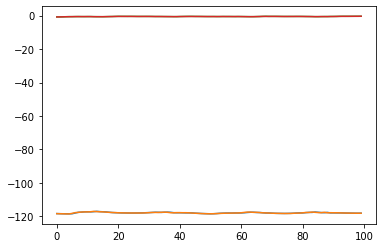

In [66]:
post_processed_df = plot_predictions2(model5, X3_test, y3_test)
post_processed_df

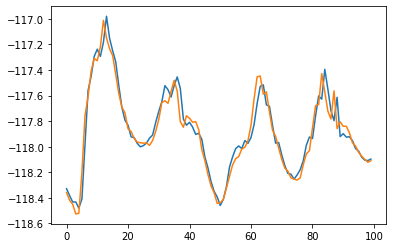

In [68]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

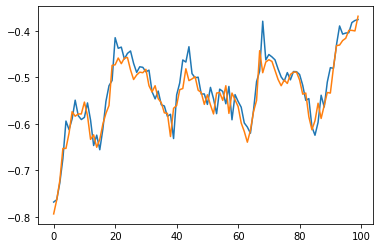

In [69]:
start, end = 0, 100
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])

In [70]:
model6 = Sequential()
model6.add(InputLayer((7,6)))
model6.add(LSTM(32, return_sequences=True))
model6.add(LSTM(64))
model6.add(Dense(8, 'relu'))
model6.add(Dense(2, 'linear'))

model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 7, 32)             4992      
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 18        
Total params: 30,362
Trainable params: 30,362
Non-trainable params: 0
_________________________________________________________________


In [72]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(),
                       metrics=[RootMeanSquaredError()])

In [73]:
model6.fit(X3_train, y3_train,
           validation_data=(X3_val, y3_val),
           epochs=10, callbacks=[cp6])

Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.0305 - root_mean_squared_error: 0.1746 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0685


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0059 - root_mean_squared_error: 0.0765 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0663


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0054 - root_mean_squared_error: 0.0736 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0633


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0053 - root_mean_squared_error: 0.0727 - val_loss: 0.0039 - val_root_mean_squared_error: 0.0622


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0052 - root_mean_squared_error: 0.0720 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0644
Epoch 6/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0051 - root_mean_squared_error: 0.0717 - val_loss: 0.0040 - val_root_mean_squared_error: 0.0631
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0051 - root_mean_squared_error: 0.0711 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0605


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 8/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0050 - root_mean_squared_error: 0.0707 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0598


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 9/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0050 - root_mean_squared_error: 0.0705 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0593


INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0050 - root_mean_squared_error: 0.0704 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0594
